In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('flights')

In [3]:
df.shape

(144, 3)

In [4]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [5]:
df.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [7]:
df.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [8]:
#df.year = df.year.astype('datetime64[ns]')
#df.year = df.year.dt.year

<AxesSubplot:xlabel='year', ylabel='count'>

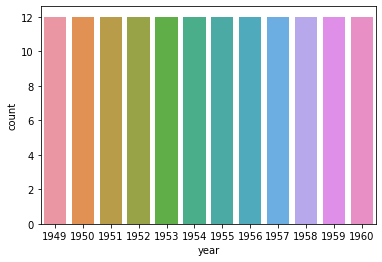

In [9]:
sns.countplot(df['year'])

<AxesSubplot:xlabel='month', ylabel='count'>

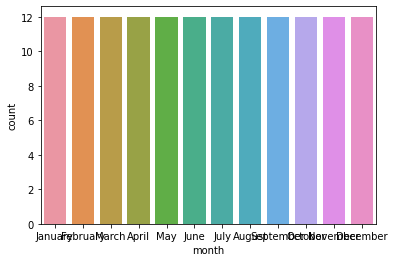

In [10]:
sns.countplot(df['month'])

<AxesSubplot:xlabel='passengers'>

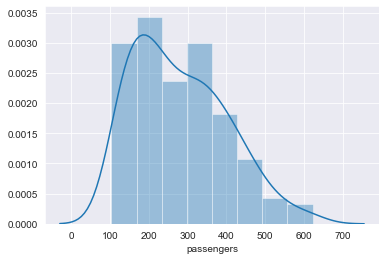

In [11]:
sns.set_style('darkgrid')
sns.distplot(df['passengers'])

<AxesSubplot:xlabel='year', ylabel='passengers'>

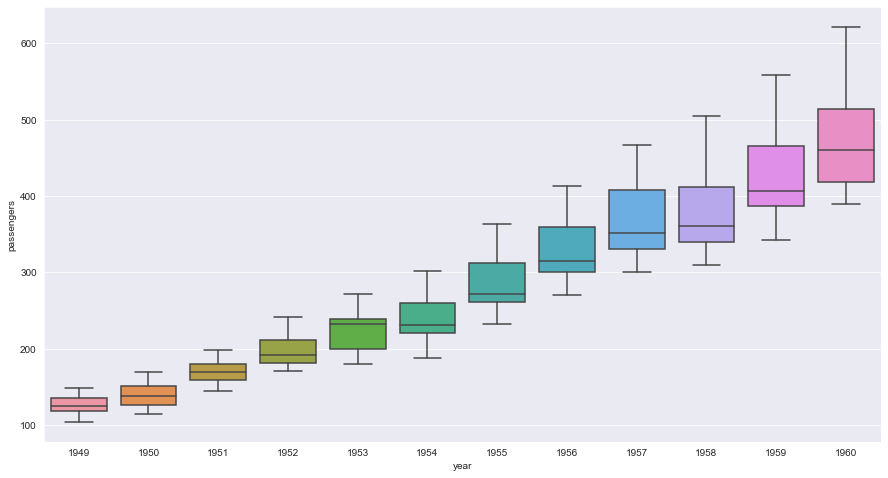

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(x='year', y='passengers', data=df)

<AxesSubplot:xlabel='month', ylabel='passengers'>

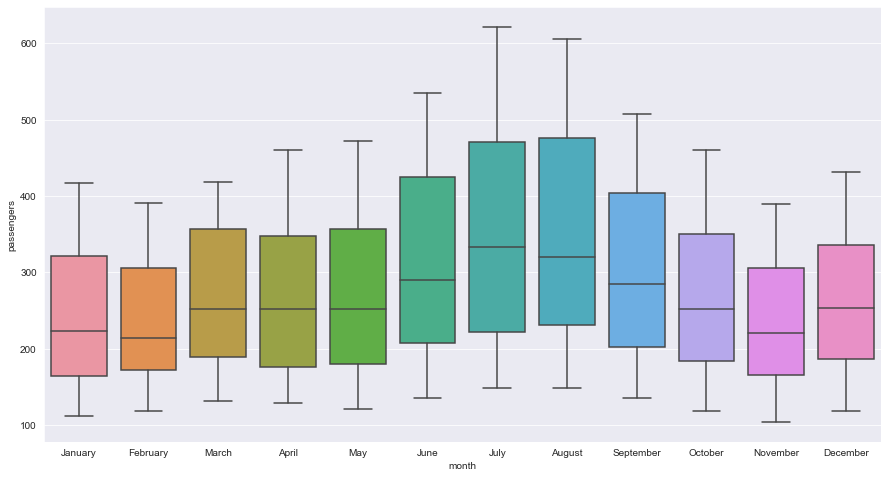

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x='month', y='passengers', data=df)

In [14]:
df.month.value_counts().sort_index()

January      12
February     12
March        12
April        12
May          12
June         12
July         12
August       12
September    12
October      12
November     12
December     12
Name: month, dtype: int64

In [15]:
df['month'] = df['month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 
                             'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [16]:
df.month = df.month.astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        144 non-null    int64
 1   month       144 non-null    int64
 2   passengers  144 non-null    int64
dtypes: int64(3)
memory usage: 3.5 KB


<AxesSubplot:>

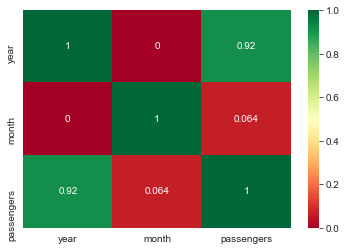

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [19]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [20]:
df_scaled = scalar.fit_transform(df)
df_scaled

array([[-1.59325501, -1.59325501, -1.40777884],
       [-1.59325501, -1.30357228, -1.35759023],
       [-1.59325501, -1.01388955, -1.24048348],
       [-1.59325501, -0.72420682, -1.26557778],
       [-1.59325501, -0.43452409, -1.33249593],
       [-1.59325501, -0.14484136, -1.21538918],
       [-1.59325501,  0.14484136, -1.10664719],
       [-1.59325501,  0.43452409, -1.10664719],
       [-1.59325501,  0.72420682, -1.20702441],
       [-1.59325501,  1.01388955, -1.34922546],
       [-1.59325501,  1.30357228, -1.47469699],
       [-1.59325501,  1.59325501, -1.35759023],
       [-1.30357228, -1.59325501, -1.38268454],
       [-1.30357228, -1.30357228, -1.29067209],
       [-1.30357228, -1.01388955, -1.16520057],
       [-1.30357228, -0.72420682, -1.21538918],
       [-1.30357228, -0.43452409, -1.29903686],
       [-1.30357228, -0.14484136, -1.09828242],
       [-1.30357228,  0.14484136, -0.9226223 ],
       [-1.30357228,  0.43452409, -0.9226223 ],
       [-1.30357228,  0.72420682, -1.022

In [21]:
data = pd.DataFrame(data=df_scaled, columns=['year', 'month', 'passengers'])
data.head()

,year,month,passengers
0,-1.593255,-1.593255,-1.407779
1,-1.593255,-1.303572,-1.357590
2,-1.593255,-1.013890,-1.240483
3,-1.593255,-0.724207,-1.265578
4,-1.593255,-0.434524,-1.332496


In [22]:
X = data.drop(['passengers'], axis=1)

In [23]:
y = data['passengers']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lin_reg.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8440563962342743
